# Demo:  PCA Eigen-Faces

In this demo, we will illustrate how to compute the PCA for a simple data set and use it as a visualization tool.

## Loading the data

We begin by loading the standard packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

We will demonstrate PCA on a face dataset taken from news articles about 10 years ago.  The full data set has thousands of faces, but we will use a small subset here.  Since this data set is widely-used, it is installed as part of the `sklearn`  

We first download the data.  This is large and can take several minutes.

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Once the data is loaded, we can get see the dimensions

In [3]:
# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = lfw_people.data
n_features = X.shape[1]

# Labels of images 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number faces   = {0:d}".format(n_samples))
print("Number classes = {0:d}".format(n_classes))


Image size     = 50 x 37 = 1850 pixels
Number faces   = 1288
Number classes = 7


## Plotting the Faces

We will plot a few faces to look at the dataset.

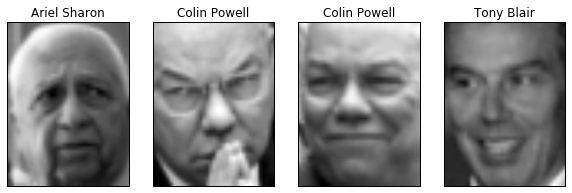

In [4]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))
nplt = 4;
for i in range(nplt):    
    ind = I[i]
    plt.subplot(1,nplt,i+1)
    plt_face(X[ind])
    plt.title(target_names[y[ind]])

## Compute the PCA

First, we subtract the mean from the data set.

In [5]:
npix = h*w
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]

Then, we compute an SVD.  Note that in python the SVD returns `V` not `V.T`.  Also, you should include the `full_matrices` option to get the *economy* SVD

In [6]:
U,S,V = np.linalg.svd(Xs, full_matrices=False)

We can plot the proportion of variance as a function of the number of PCs

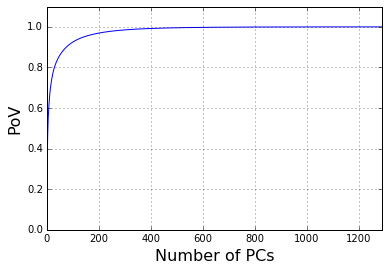

In [7]:
lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.grid()
plt.axis([1,n_samples,0, 1.1])
plt.xlabel('Number of PCs', fontsize=16)
plt.ylabel('PoV', fontsize=16)

In [8]:
nsvd = 20
Xhat = (U[:,:nsvd]*S[None,:nsvd]).dot(V[:nsvd,:])
Xhat = Xhat + Xmean[None,:]

In [9]:
Xhat.shape
#show_face(Xhat[i,:], target_names[y[i]])

(1288, 1850)

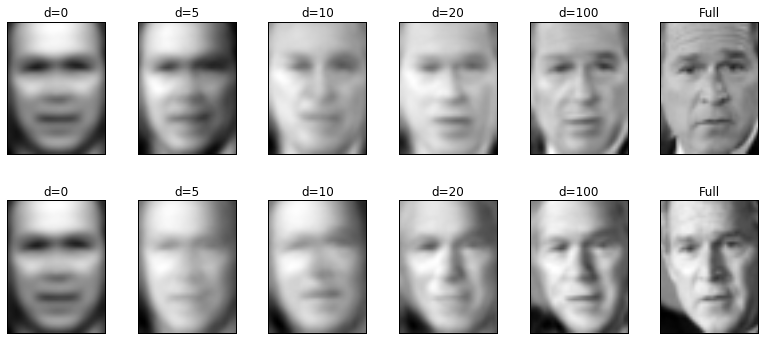

In [10]:
nplt = 2               # number of faces to plot
ds = [0,5,10,20,100]   # number of SVD approximations

# Select random faces
inds = np.random.permutation(n_samples)
inds = inds[:nplt]
nd = len(ds)

# Set figure size
plt.figure(figsize=(1.8 * (nd+1), 2.4 * nplt))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

# Loop over figures
iplt = 0
for ind in inds:
    for d in ds:
        plt.subplot(nplt,nd+1,iplt+1)
        Xhati = (U[ind,:d]*S[None,:d]).dot(V[:d,:]) + Xmean
        plt_face(Xhati)
        plt.title('d={0:d}'.format(d))
        iplt += 1
    
    # Plot the true face
    plt.subplot(nplt,nd+1,iplt+1)
    plt_face(X[ind,:])
    plt.title('Full')
    iplt += 1

Finally, we plot the PCs

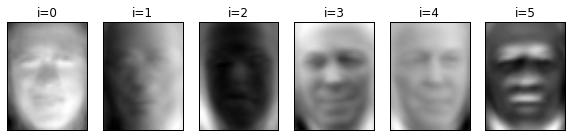

In [11]:
nplt = 6
plt.figure(figsize=(10, 20))
for i in range(nplt):
    plt.subplot(1,nplt,i+1)
    Vi = V[i,:]
    plt_face(V[i,:])
    plt.title('i={0:d}'.format(i))